In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv("data/output.csv")
df.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name
0,Other Manufacturer,Ultrabook,13.3,8.0,128,MacOS,1.37,11912523.0,IPS Panel Retina Display
1,Other Manufacturer,Ultrabook,13.3,8.0,128,MacOS,1.34,7993374.0,IPS Panel Retina Display
2,HP,Notebook,15.6,8.0,256,MacOS,1.86,5112900.0,Full HD
3,Other Manufacturer,Ultrabook,15.4,14.0,512,MacOS,1.83,22563005.0,IPS Panel Retina Display
4,Other Manufacturer,Ultrabook,13.3,8.0,256,MacOS,1.37,16037611.0,IPS Panel Retina Display


In [3]:
X = df.drop(columns=['Price'],axis=1)
y = df['Price']

In [4]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [5]:
X = preprocessor.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((992, 30), (248, 30))

In [7]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3166714.4795
- Mean Absolute Error: 2435581.9932
- R2 Score: 0.7018
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3174304.7999
- Mean Absolute Error: 2440580.0736
- R2 Score: 0.6613


Lasso
Model performance for Training set
- Root Mean Squared Error: 3166714.4797
- Mean Absolute Error: 2435583.2254
- R2 Score: 0.7018
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3174300.9069
- Mean Absolute Error: 2440578.7075
- R2 Score: 0.6613


Ridge
Model performance for Training set
- Root Mean Squared Error: 3168034.7438
- Mean Absolute Error: 2438999.0884
- R2 Score: 0.7016
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3170082.2498
- Mean Absolute Error: 2442311.4651
- R2 Score: 0.6622




g:\laptop_price_prediction\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916166433914483.0, tolerance: 3336176353415.9756
  model = cd_fast.sparse_enet_coordinate_descent(


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2345917.7702
- Mean Absolute Error: 1681002.8929
- R2 Score: 0.8364
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2895273.7792
- Mean Absolute Error: 2128588.2447
- R2 Score: 0.7182


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 701492.7891
- Mean Absolute Error: 266923.8319
- R2 Score: 0.9854
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3431274.7415
- Mean Absolute Error: 2281679.9586
- R2 Score: 0.6042


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1107015.9791
- Mean Absolute Error: 781135.7370
- R2 Score: 0.9636
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2514737.3981
- Mean Absolute Error: 1798580.5632
- R2 Score: 0.7874


XGBRegressor
Model performance for Training set
- Root Mean Squa

In [9]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.814895
6,XGBRegressor,0.813504
5,Random Forest Regressor,0.787413
3,K-Neighbors Regressor,0.718206
2,Ridge,0.662174
1,Lasso,0.661274
0,Linear Regression,0.661273
8,AdaBoost Regressor,0.627579
4,Decision Tree,0.604212


In [11]:
lin_model =  CatBoostRegressor(verbose=False)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.49


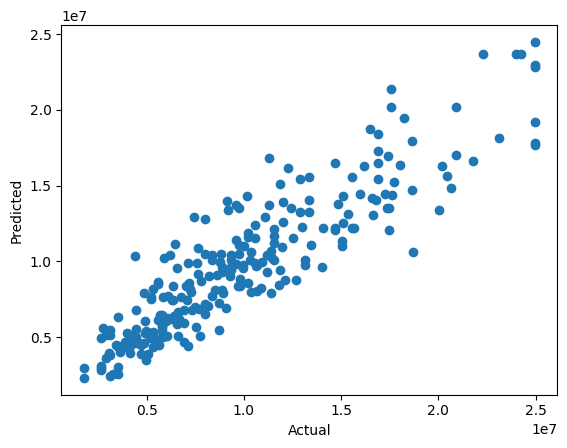

In [12]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

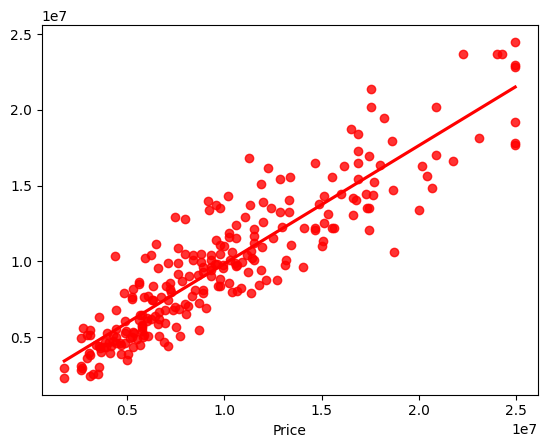

In [13]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');